In [1]:
import pandas as pd              # pandas: 2.1.0
import numpy as np               # numpy: 1.26
import matplotlib.pyplot as plt  # matplotlib: 3.8.0
import seaborn as sns            # seaborn: 0.12.2
import os                        
import datetime as dt


%matplotlib inline

In [2]:
# This code will tell the version the libraries used in the code

import pkg_resources

# List all installed packages and their versions
installed_packages = {pkg.key: pkg.version for pkg in pkg_resources.working_set}

# List of imported libraries
imported_libraries = ['pandas', 'numpy', 'matplotlib', 'scipy', 'seaborn']

# Print imported libraries and their versions
for library in imported_libraries:
    if library in installed_packages:
        print(f"{library}: {installed_packages[library]}")
    else:
        print(f"{library}: Not found in installed packages")



pandas: 2.1.0
numpy: 1.26.0
matplotlib: 3.8.0
scipy: 1.11.2
seaborn: 0.12.2


C:\Users\praty\AppData\Local\Temp\ipykernel_18620\3294060604.py:3: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [3]:
# User will give only the path of the folder & code will look for all the csv file & then create all the DataFrame automatically as per the name of the file

mypath = "C:/Users/praty/Desktop/work/analabs/Python Foundation End to End Case Study E-Commerce Analytics Project"
csv_files = []
def search_csv_file():
    """
    function to search all csv files in a folder path
    """
    for files in os.listdir(mypath):
        if files.endswith('.csv'):
            csv_files.append(files)

search_csv_file()

In [4]:
file_paths = []
dataframe_names = []

def DataframeNameCreation_FilePathCreation():
    """
    function to create DataFrame names & File Path
    """
    for i in csv_files:
        x = 'df_' + str(i).split('/')[-1].split('.')[0]
        y = os.path.join(mypath ,i)
        dataframe_names.append(x)
        file_paths.append(y)

DataframeNameCreation_FilePathCreation()

In [5]:
def read_dataframes(dataframe_names, file_paths):
    """
    Read data from CSV files into dataframes and assign dataframe names automatically.

    Args:
        dataframe_names (list of str): List of desired dataframe names.
        file_paths (list of str): List of file paths for the CSV files.

    Returns:
        dict: A dictionary of dataframes with automatic naming.
    """
    dataframes = {}
    
    for file_path, df_name in zip(file_paths, dataframe_names):
        try:
            # Read data from the file into a dataframe
            df = pd.read_csv(file_path)
            
            # Store the dataframe in the dictionary using the specified df_name
            dataframes[df_name] = df
        except Exception as e:
            print(f"Error reading data from {file_path}: {str(e)}")
    
    return dataframes


# Call the function to read data and assign dataframe names
dataframes = read_dataframes(dataframe_names, file_paths)

# Automate the creation of variables for dataframes using a loop
for df_name in dataframe_names:
    globals()[df_name] = dataframes[df_name]

# Print all dataframe names
print("ALl Dataframes are:")
for df_name in dataframes.keys():
    print(df_name)

ALl Dataframes are:
df_CUSTOMERS
df_GEO_LOCATION
df_ORDERS
df_ORDER_ITEMS
df_ORDER_PAYMENTS
df_ORDER_REVIEW_RATINGS
df_PRODUCTS
df_SELLERS


In [6]:
df_CUSTOMERS.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [7]:
df_PRODUCTS.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [8]:
df_ORDER_REVIEW_RATINGS.columns

Index(['review_id', 'order_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [9]:
df_ORDERS.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [10]:
df_GEO_LOCATION.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [11]:
df_ORDER_PAYMENTS.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [12]:
df_SELLERS.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

In [13]:
df_ORDER_ITEMS.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

# Perform Detailed exploratory analysis

In [14]:
# Q1(a). Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…

In [15]:
# Total Revenue
print(f"The total revenue is {df_ORDER_PAYMENTS['payment_value'].sum()}")

The total revenue is 16008872.12


In [16]:
# Total Quantity
print(f"The total quantity is {df_PRODUCTS['product_photos_qty'].sum().astype('int')}")

The total quantity is 70794


In [17]:
# Total Products
print(f"The total products are {df_PRODUCTS['product_id'].nunique()}")

The total products are 32951


In [18]:
# Total categories
print(f"The total categories are {df_PRODUCTS['product_category_name'].nunique()}")

The total categories are 71


In [19]:
# Total sellers
print(f"The total sellers are {df_SELLERS['seller_id'].nunique()}")

The total sellers are 3095


In [20]:
# Total locations
print(f"The total locations are {df_GEO_LOCATION['geolocation_zip_code_prefix'].nunique()}")

The total locations are 19015


In [21]:
# Total payment methods
print(f"Total payment methods are {df_ORDER_PAYMENTS['payment_type'].nunique()}")

Total payment methods are 5


In [22]:
# Q 1(b). Understanding how many new customers acquired every month
df_ORDERS['order_purchase_timestamp'] = pd.to_datetime(df_ORDERS['order_purchase_timestamp']) # convert order_purchase_timestamp into proper datetime format
df_ORDERS['order_purchase_month'] = df_ORDERS.order_purchase_timestamp.dt.month # create a new column for purchase month
mydf = df_ORDERS.sort_values(by=['order_purchase_timestamp'], ascending=True) # create a new dataframe where order_purchase_timestamp is sorted in ascending order
mydf=mydf.drop_duplicates('customer_id',keep='first') # removing all duplicate customer_id so that we do NOT have any repeated customers
mydf_MonthWise_CustomerCount = mydf.groupby(['order_purchase_month']).agg({'customer_id':'count'}).reset_index()
mydf_MonthWise_CustomerCount['new_customer_count'] = mydf_MonthWise_CustomerCount['customer_id'].diff()
mydf_MonthWise_CustomerCount

,order_purchase_month,customer_id,new_customer_count
0,1,8069,NaN
1,2,8508,439.0
2,3,9893,1385.0
3,4,9343,-550.0
4,5,10573,1230.0
5,6,9412,-1161.0
6,7,10318,906.0
7,8,10843,525.0
8,9,4305,-6538.0
9,10,4959,654.0


In [23]:
# Q1(c): Understand the retention of customers on month on month basis

### I have solved this question by two methods namely Method 1 & Method 2. Both are given below

In [24]:
# Method 1:
df_ORDERS[df_ORDERS.duplicated('customer_id')]
# there are NO duplicate customer_id in the orders table
# it means no customer has placed order twice

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_month


In [25]:
print(df_ORDERS['customer_id'].value_counts().max())
# the maximum count of each value is 1
# it means no customer has placed order twice

1


In [26]:
# Based on above two criterias, we can say that there is NO retension of customers

In [27]:
# Method 2:
# we are finding the minimum and maximum order_purchase_timestamp for every customer_id. If max_order_purchase_timestamp > min_order_purchase_timestamp. It means customer has done shopping more than once
mydf_ORDERS_customer_idANDmin_of_order_purchase_timestamp = df_ORDERS.groupby('customer_id').agg({'order_purchase_timestamp':'min'}).reset_index()
mydf_ORDERS_customer_idANDmin_of_order_purchase_timestamp.columns = ['customer_id', 'min_order_purchase_timestamp']

mydf_ORDERS_customer_idANDmax_of_order_purchase_timestamp = df_ORDERS.groupby('customer_id').agg({'order_purchase_timestamp':'max'}).reset_index()
mydf_ORDERS_customer_idANDmax_of_order_purchase_timestamp.columns=['customer_id','max_order_purchase_timestamp']

mydf_ORDERS_customer_idANDmin_of_order_purchase_timestampANDmax_of_order_purchase_timestamp = pd.merge(left=mydf_ORDERS_customer_idANDmin_of_order_purchase_timestamp, right=mydf_ORDERS_customer_idANDmax_of_order_purchase_timestamp, how='left', on='customer_id')

mydf_ORDERS_customer_idANDmin_of_order_purchase_timestampANDmax_of_order_purchase_timestamp[
mydf_ORDERS_customer_idANDmin_of_order_purchase_timestampANDmax_of_order_purchase_timestamp['max_order_purchase_timestamp'] > mydf_ORDERS_customer_idANDmin_of_order_purchase_timestampANDmax_of_order_purchase_timestamp['min_order_purchase_timestamp']]

# we can see that NO customer has done shopping more than once.
# we can say that there is NO retension of customers

,customer_id,min_order_purchase_timestamp,max_order_purchase_timestamp


In [28]:
# Q1(d): How the revenues from existing/new customers on month on month basis

In [29]:
mydf_ORDERSandORDER_PAYMENTS = pd.merge(left=df_ORDER_PAYMENTS, right=df_ORDERS, on='order_id', how='left' )

In [30]:
mydf_ORDERSandORDER_PAYMENTS_MonthWise_Payment = mydf_ORDERSandORDER_PAYMENTS.groupby('order_purchase_month').agg({'payment_value':'sum'}).reset_index()
mydf_ORDERSandORDER_PAYMENTS_MonthWise_Payment

,order_purchase_month,payment_value
0,1,1253492.22
1,2,1284371.35
2,3,1609515.72
3,4,1578573.51
4,5,1746900.97
5,6,1535156.88
6,7,1658923.67
7,8,1696821.64
8,9,732454.23
9,10,839358.03


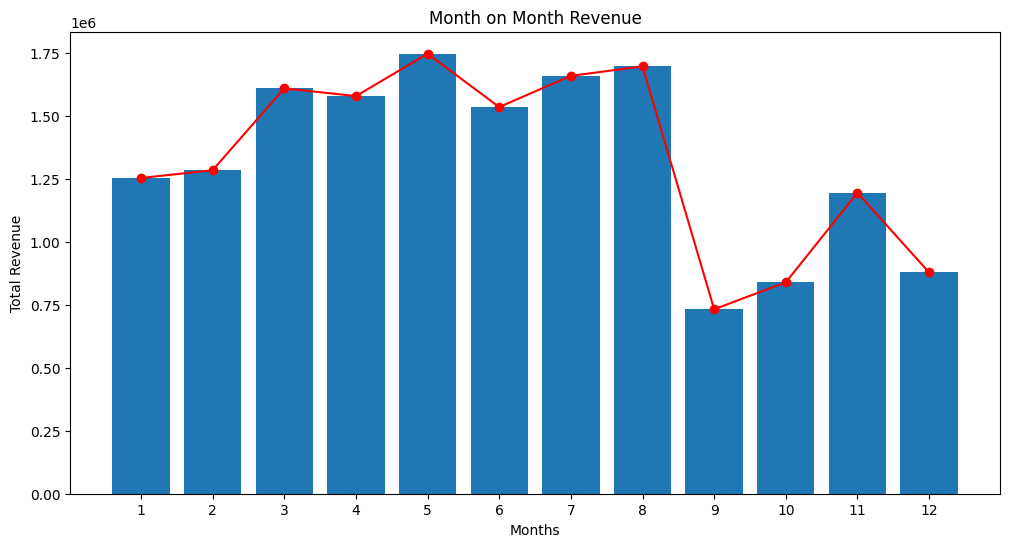

In [31]:
plt.figure(figsize = (12, 6))
plt.bar( mydf_ORDERSandORDER_PAYMENTS_MonthWise_Payment.order_purchase_month, mydf_ORDERSandORDER_PAYMENTS_MonthWise_Payment.payment_value)
plt.plot(mydf_ORDERSandORDER_PAYMENTS_MonthWise_Payment.order_purchase_month, mydf_ORDERSandORDER_PAYMENTS_MonthWise_Payment.payment_value, color='red', marker='o', linestyle='-', label="Line Plot")
plt.xlabel("Months")
plt.ylabel("Total Revenue")
plt.title("Month on Month Revenue")
plt.xticks(mydf_ORDERSandORDER_PAYMENTS_MonthWise_Payment.order_purchase_month)
plt.show()

In [32]:
# Q1(e): Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc

In [33]:
mydf_ORDERSandORDER_PAYMENTS.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_month
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:00,4/25/2018 22:15,5/2/2018 15:20,5/9/2018 17:36,5/22/2018 0:00,4
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:00,6/26/2018 11:18,6/28/2018 14:18,6/29/2018 20:32,7/16/2018 0:00,6
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:00,12/14/2017 9:52,12/15/2017 20:13,12/18/2017 17:24,1/4/2018 0:00,12
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:00,12/6/2017 12:13,12/7/2017 20:28,12/21/2017 1:35,1/4/2018 0:00,12
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:00,5/21/2018 16:14,5/22/2018 11:46,6/1/2018 21:44,6/13/2018 0:00,5


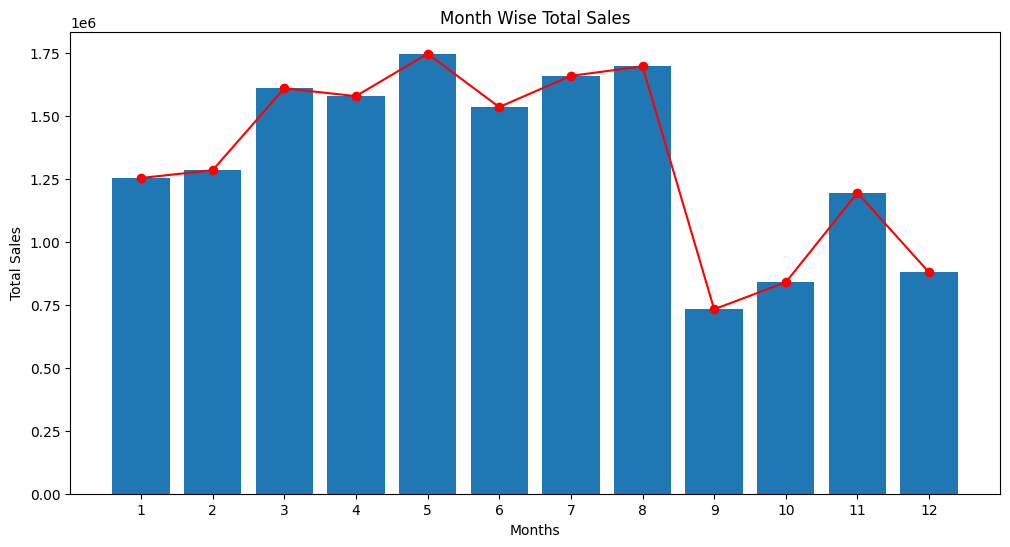

In [34]:
# Month Wise Total Sales
mydf_ORDERSandORDER_PAYMENTS_order_purchase_monthANDpayment_value = mydf_ORDERSandORDER_PAYMENTS.groupby('order_purchase_month').agg({'payment_value':'sum'}).reset_index()
mydf_ORDERSandORDER_PAYMENTS_order_purchase_monthANDpayment_value.columns = ['order_purchase_month', 'total_payment_value']
plt.figure(figsize = (12, 6))
plt.bar( mydf_ORDERSandORDER_PAYMENTS_order_purchase_monthANDpayment_value.order_purchase_month, mydf_ORDERSandORDER_PAYMENTS_order_purchase_monthANDpayment_value.total_payment_value)
plt.plot(mydf_ORDERSandORDER_PAYMENTS_order_purchase_monthANDpayment_value.order_purchase_month, mydf_ORDERSandORDER_PAYMENTS_order_purchase_monthANDpayment_value.total_payment_value, color='red', marker='o', linestyle='-', label="Line Plot")
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.title("Month Wise Total Sales")
plt.xticks(mydf_ORDERSandORDER_PAYMENTS_order_purchase_monthANDpayment_value.order_purchase_month)
plt.show()

In [35]:
mydf_ORDERSandORDER_PAYMENTS.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_purchase_month'],
      dtype='object')

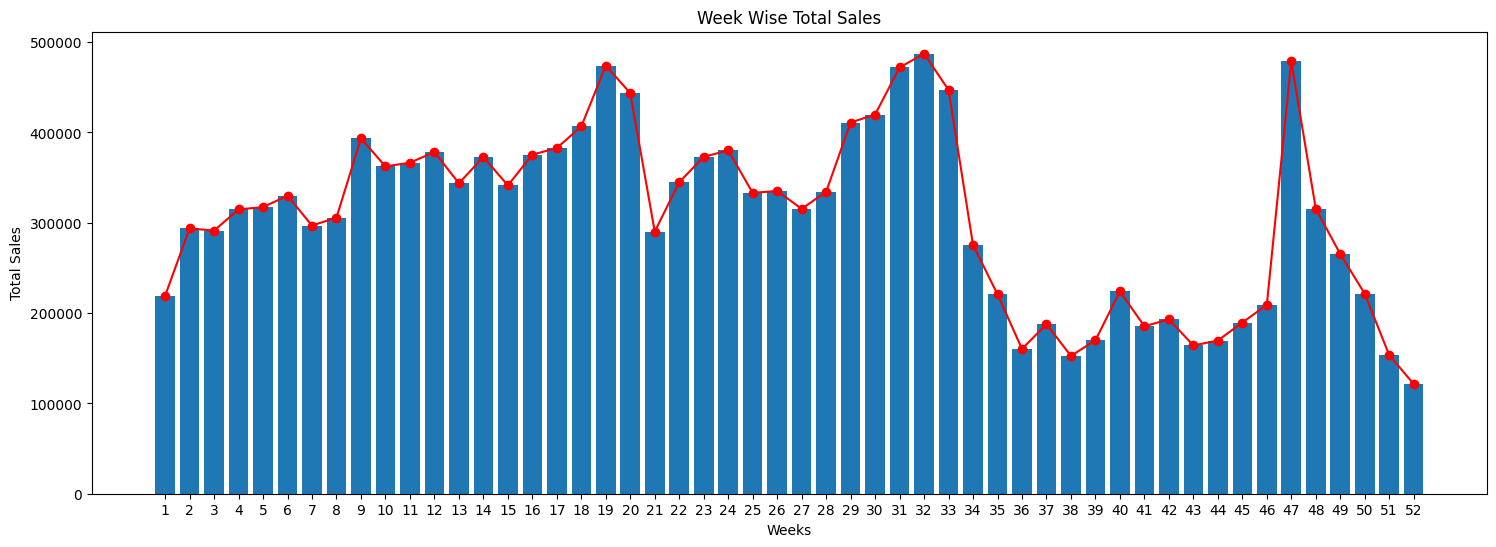

In [36]:
# Week Wise Total Sales

mydf_ORDERSandORDER_PAYMENTS['order_purchase_week'] = mydf_ORDERSandORDER_PAYMENTS['order_purchase_timestamp'].dt.isocalendar().week # creating the week column in the dataframe

mydf_ORDERSandORDER_PAYMENTS_order_purchase_weekANDpayment_value = mydf_ORDERSandORDER_PAYMENTS.groupby('order_purchase_week').agg({'payment_value':'sum'}).reset_index()
mydf_ORDERSandORDER_PAYMENTS_order_purchase_weekANDpayment_value.columns = ['order_purchase_week', 'total_payment_value']

plt.figure(figsize = (18, 6))

# Create the Bar plot
plt.bar(
    mydf_ORDERSandORDER_PAYMENTS_order_purchase_weekANDpayment_value.order_purchase_week, mydf_ORDERSandORDER_PAYMENTS_order_purchase_weekANDpayment_value.total_payment_value
)

# Create the line plot
plt.plot(
    mydf_ORDERSandORDER_PAYMENTS_order_purchase_weekANDpayment_value.order_purchase_week, mydf_ORDERSandORDER_PAYMENTS_order_purchase_weekANDpayment_value.total_payment_value, color='red', marker='o', linestyle='-', label="Line Plot"
)

plt.xlabel("Weeks")
plt.ylabel("Total Sales")
plt.title("Week Wise Total Sales")
plt.xticks(mydf_ORDERSandORDER_PAYMENTS_order_purchase_weekANDpayment_value.order_purchase_week.astype(int))
plt.show()

c:\Users\praty\AppData\Local\anaconda3\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\praty\AppData\Local\anaconda3\envs\py311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


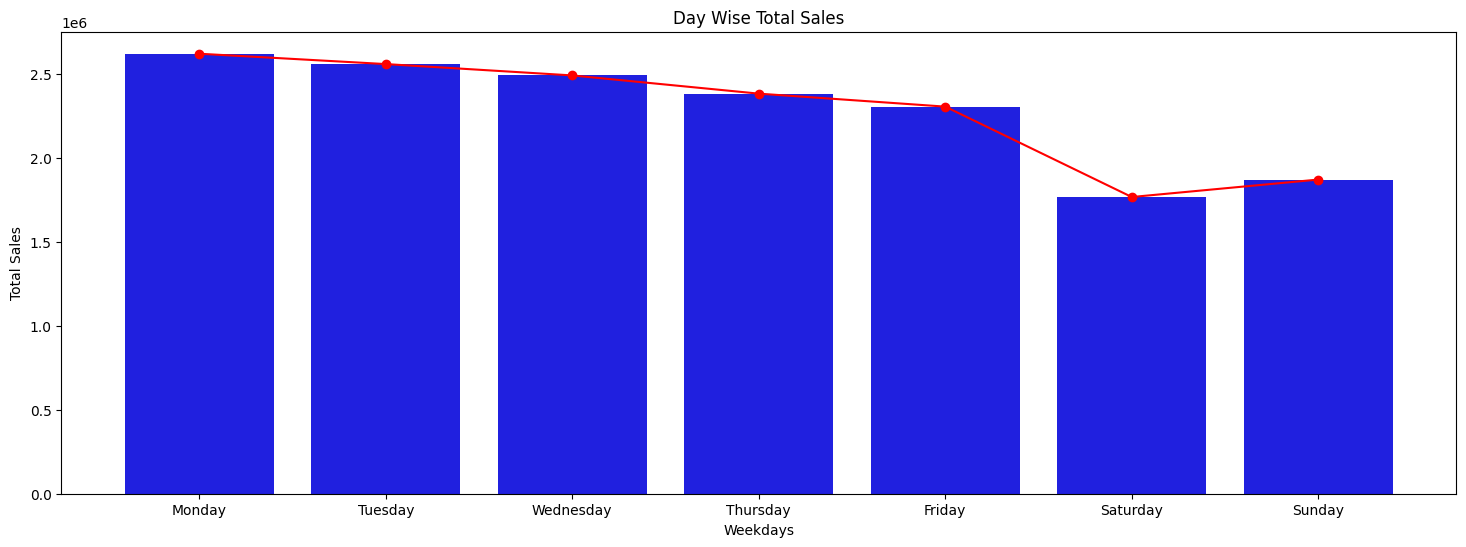

In [37]:
# Day Wise Total Sales
mydf_ORDERSandORDER_PAYMENTS['order_purchase_day_name'] = mydf_ORDERSandORDER_PAYMENTS['order_purchase_timestamp'].dt.day_name() # creating the day_name column in the dataframe

mydf_ORDERSandORDER_PAYMENTS_order_purchase_day_nameANDpayment_value = mydf_ORDERSandORDER_PAYMENTS.groupby('order_purchase_day_name').agg({'payment_value':'sum'}).reset_index()
mydf_ORDERSandORDER_PAYMENTS_order_purchase_day_nameANDpayment_value.columns = ['order_purchase_day_name', 'total_payment_value']


# Define the order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the 'order_purchase_day_name' column to a categorical data type with the specified order
weekday_cat = pd.Categorical(mydf_ORDERSandORDER_PAYMENTS_order_purchase_day_nameANDpayment_value.order_purchase_day_name, categories=weekday_order, ordered=True)

# Assign the categorical variable back to the DataFrame
mydf_ORDERSandORDER_PAYMENTS_order_purchase_day_nameANDpayment_value['order_purchase_day_name'] = weekday_cat

# Sort the DataFrame by the specified order
mydf_ORDERSandORDER_PAYMENTS_order_purchase_day_nameANDpayment_value = mydf_ORDERSandORDER_PAYMENTS_order_purchase_day_nameANDpayment_value.sort_values(by='order_purchase_day_name')

plt.figure(figsize=(18, 6))

# Create a bar plot using Seaborn
sns.barplot(
    x=mydf_ORDERSandORDER_PAYMENTS_order_purchase_day_nameANDpayment_value.order_purchase_day_name,
    y=mydf_ORDERSandORDER_PAYMENTS_order_purchase_day_nameANDpayment_value.total_payment_value,
    color='blue',  # Customize the bar color
)

# Create the line plot
plt.plot(
    mydf_ORDERSandORDER_PAYMENTS_order_purchase_day_nameANDpayment_value.order_purchase_day_name,
    mydf_ORDERSandORDER_PAYMENTS_order_purchase_day_nameANDpayment_value.total_payment_value,
    color='red', marker='o', linestyle='-', label="Line Plot"
)

plt.xlabel("Weekdays")
plt.ylabel("Total Sales")
plt.title("Day Wise Total Sales")

plt.show()

In [38]:
mydf_ORDERSandORDER_PAYMENTS.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_month,order_purchase_week,order_purchase_day_name
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:00,4/25/2018 22:15,5/2/2018 15:20,5/9/2018 17:36,5/22/2018 0:00,4,17,Wednesday
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:00,6/26/2018 11:18,6/28/2018 14:18,6/29/2018 20:32,7/16/2018 0:00,6,26,Tuesday
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:00,12/14/2017 9:52,12/15/2017 20:13,12/18/2017 17:24,1/4/2018 0:00,12,50,Tuesday
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:00,12/6/2017 12:13,12/7/2017 20:28,12/21/2017 1:35,1/4/2018 0:00,12,49,Wednesday
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:00,5/21/2018 16:14,5/22/2018 11:46,6/1/2018 21:44,6/13/2018 0:00,5,21,Monday


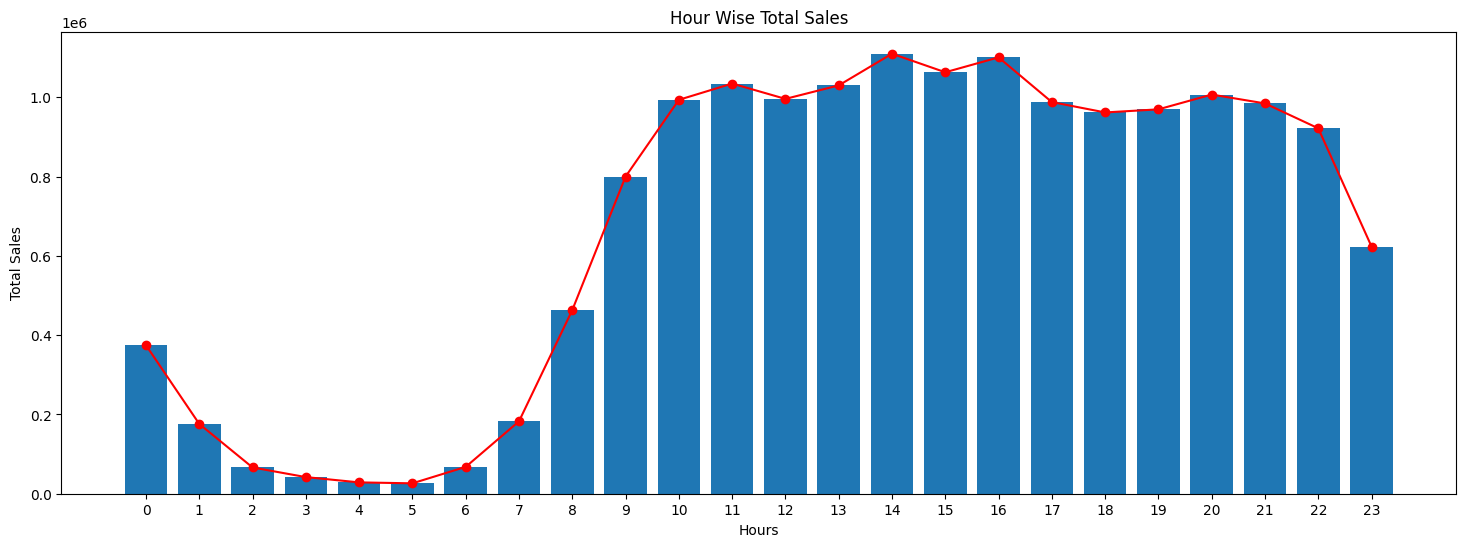

In [39]:
# Hour Wise Total Sales
mydf_ORDERSandORDER_PAYMENTS['order_purchase_hour'] = mydf_ORDERSandORDER_PAYMENTS['order_purchase_timestamp'].dt.hour # creating the hour column in the dataframe

mydf_ORDERSandORDER_PAYMENTS_order_purchase_hourANDpayment_value = mydf_ORDERSandORDER_PAYMENTS.groupby('order_purchase_hour').agg({'payment_value':'sum'}).reset_index()
mydf_ORDERSandORDER_PAYMENTS_order_purchase_hourANDpayment_value.columns = ['order_purchase_hour', 'total_payment_value']

plt.figure(figsize = (18, 6))

# Create the Bar plot
plt.bar(
    mydf_ORDERSandORDER_PAYMENTS_order_purchase_hourANDpayment_value.order_purchase_hour, mydf_ORDERSandORDER_PAYMENTS_order_purchase_hourANDpayment_value.total_payment_value
)

# Create the line plot
plt.plot(
    mydf_ORDERSandORDER_PAYMENTS_order_purchase_hourANDpayment_value.order_purchase_hour, mydf_ORDERSandORDER_PAYMENTS_order_purchase_hourANDpayment_value.total_payment_value, color='red', marker='o', linestyle='-', label="Line Plot"
)

plt.xlabel("Hours")
plt.ylabel("Total Sales")
plt.title("Hour Wise Total Sales")
plt.xticks(mydf_ORDERSandORDER_PAYMENTS_order_purchase_hourANDpayment_value.order_purchase_hour.astype(int))
plt.show()

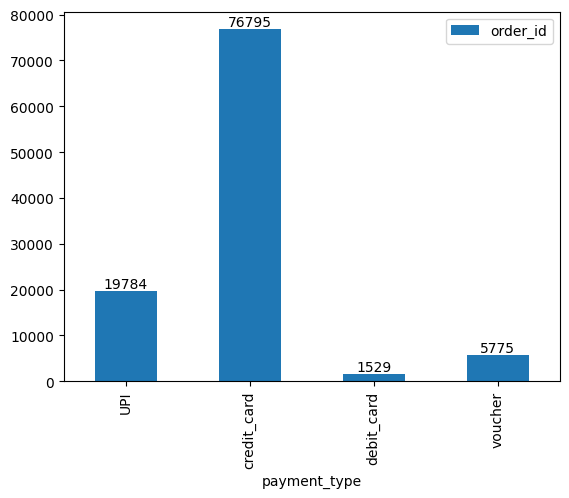

In [40]:
# Total Orders by Payment Method

mydf_ORDERSandORDER_PAYMENTS.payment_type.unique() # we have payment_type as 'not_defined' where order is cancelled. 
mydf_ORDERSandORDER_PAYMENTS_RemovedCancelledOrders = mydf_ORDERSandORDER_PAYMENTS.drop(mydf_ORDERSandORDER_PAYMENTS[mydf_ORDERSandORDER_PAYMENTS.payment_type =='not_defined'].index) #Removing the rows where order is cancelled.

# plotting the bar chart
mydf_ORDERSandORDER_PAYMENTS_RemovedCancelledOrders_payment_typeANDorder_id_count_plot = mydf_ORDERSandORDER_PAYMENTS_RemovedCancelledOrders.groupby('payment_type').agg({'order_id':'count'}).reset_index().plot(kind='bar', x='payment_type', y='order_id')

# creating the bar labels in the bar chart
mydf_ORDERSandORDER_PAYMENTS_RemovedCancelledOrders_payment_typeANDorder_id_count_plot.bar_label(mydf_ORDERSandORDER_PAYMENTS_RemovedCancelledOrders_payment_typeANDorder_id_count_plot.containers[0])

plt.show()

In [41]:
# Category Wise total quantity

df_PRODUCTS.groupby('product_category_name').agg({'product_photos_qty':'sum'}).reset_index()

,product_category_name,product_photos_qty
0,Agro_Industry_And_Commerce,171.0
1,Air_Conditioning,269.0
2,Art,119.0
3,Arts_And_Craftmanship,57.0
4,Audio,118.0
...,...,...
66,Stationery,2291.0
67,Tablets_Printing_Image,27.0
68,Telephony,3129.0
69,Toys,3469.0


In [42]:
# Total Sales by location

mydf_ORDERSandORDER_PAYMENTSandCUSTOMERS = pd.merge(left=mydf_ORDERSandORDER_PAYMENTS, right=df_CUSTOMERS, how='left', on='customer_id')

mydf_ORDERSandORDER_PAYMENTSandCUSTOMERS.groupby('customer_state').agg({'payment_value':'sum'}).reset_index()

,customer_state,payment_value
0,Andhra Pradesh,9428445.41
1,Arunachal Pradesh,186887.53
2,Chhattisgarh,1083216.09
3,Delhi,586151.00
4,Goa,989.83
5,Gujarat,1256332.44
6,Haryana,362074.27
7,Himachal Pradesh,121288.80
8,Jammu & Kashmir,251295.09
9,Karnataka,633173.89


In [43]:
# Total Orders by location
mydf_ORDERSandORDER_PAYMENTSandCUSTOMERS.groupby('customer_state').agg({'order_id':'count'}).reset_index()

,customer_state,order_id
0,Andhra Pradesh,63563
1,Arunachal Pradesh,1157
2,Chhattisgarh,6622
3,Delhi,3485
4,Goa,10
5,Gujarat,7782
6,Haryana,2320
7,Himachal Pradesh,762
8,Jammu & Kashmir,1587
9,Karnataka,4035


In [44]:
# 1(e): Popular Products by month, seller, state, category


In [45]:
# Popular Products by month

mydf_PRODUCTSandORDER_ITEMSandORDERS = pd.merge(left=df_PRODUCTS, right=df_ORDER_ITEMS, how='left', on='product_id').merge(df_ORDERS, on='order_id')

mydf_PRODUCTSandORDER_ITEMSandORDERS_order_purchase_monthANDproduct_idANDorder_id = mydf_PRODUCTSandORDER_ITEMSandORDERS.groupby(['order_purchase_month','product_id']).agg({'order_id':'count'}).reset_index().sort_values(by='order_id', ascending=False) # product_id which is ordered maximum in each month
mydf_PRODUCTSandORDER_ITEMSandORDERS_order_purchase_monthANDproduct_idANDorder_id = mydf_PRODUCTSandORDER_ITEMSandORDERS_order_purchase_monthANDproduct_idANDorder_id.drop_duplicates(subset=['order_purchase_month'], keep='first').sort_values(by='order_purchase_month')
# ordered in descending order, now drop duplicates based on month, 

mydf_PRODUCTSandORDER_ITEMSandORDERS_order_purchase_monthANDproduct_idANDorder_id # these product_id are the maximum ordered product in each month

,order_purchase_month,product_id,order_id
3087,1,aca2eb7d00ea1a7b8ebd4e68314663af,122
9022,2,e53e557d5a159f5aa2c5e995dfdf244b,71
13448,3,aca2eb7d00ea1a7b8ebd4e68314663af,65
17232,4,53b36df67ebb7c41585e8d54d6772e08,85
23250,5,53b36df67ebb7c41585e8d54d6772e08,114
30973,6,99a4788cb24856965c36a24e339b6058,74
37197,7,99a4788cb24856965c36a24e339b6058,70
46144,8,e7cc48a9daff5436f63d3aad9426f28b,68
47539,9,422879e10f46682990de24d770e7f83d,37
50456,10,422879e10f46682990de24d770e7f83d,39


In [46]:
# Popular Products by Seller

pd.merge(left=df_ORDERS, right=df_ORDER_ITEMS, how='left', on='order_id').groupby(['seller_id','product_id']).agg({'order_id':'count'}).reset_index().sort_values(by='order_id', ascending=False)

# this shows seller with the product they sold along with the number of orders of that product

,seller_id,product_id,order_id
21025,955fee9216a65b617aa5c0531780ce60,aca2eb7d00ea1a7b8ebd4e68314663af,527
4645,1f50f920176fa81dab994f9023523100,422879e10f46682990de24d770e7f83d,484
9881,4a3ca9315b744ce9f8e9374361493884,99a4788cb24856965c36a24e339b6058,482
4643,1f50f920176fa81dab994f9023523100,389d119b48cf3043d311335e499d9c6b,392
4642,1f50f920176fa81dab994f9023523100,368c6c730842d78016ad823897a372db,388
...,...,...,...
14810,6edacfd9f9074789dad6d62ba7950b9c,759be9d8dec6d1622e7b0b8be27740fe,1
14809,6edacfd9f9074789dad6d62ba7950b9c,753d279facc7d9ca90f2e8bfb2bab052,1
14808,6edacfd9f9074789dad6d62ba7950b9c,73c32b5af96fecd16fed3efde88ea2c6,1
14806,6edacfd9f9074789dad6d62ba7950b9c,6feea907f9f949ce09d7d8ed626fd89a,1


In [47]:
# Popular Products by State

pd.merge(left=df_ORDER_ITEMS, right=df_SELLERS, how='left', on='seller_id').groupby(['seller_state','product_id']).agg({'order_id':'count'}).reset_index().sort_values(by='order_id', ascending=False).drop_duplicates(subset='seller_state', keep='first')

# this shows state with the product which were sold along with the number of orders of that product

,seller_state,product_id,order_id
14387,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,527
27206,Gujarat,99a4788cb24856965c36a24e339b6058,488
32952,West Bengal,d1c427060a0f73f6b889a5c7c61f2ac4,343
28967,Haryana,0aabfb375647d9738ad0f7b4ea3653b1,142
23742,Delhi,08574b074924071f4e201e151b152b4e,113
22237,Chhattisgarh,437c05a395e9e47f9762e677a7068ce7,90
21637,Arunachal Pradesh,cec09725da5ed01471d9a505e7389d37,71
30128,Jammu & Kashmir,11875b30b49585209e608f40e8082e65,64
32166,Maharashtra,b623b7cb05ee3248fbe4a6ecbeed79a4,61
32287,Orissa,e9a69340883a438c3f91739d14d3a56d,58


In [48]:
# Popular Products by Category

pd.merge(left=df_ORDER_ITEMS, right=df_PRODUCTS, how='left', on='product_id').groupby('product_category_name').agg({'order_id':'count'}).reset_index().sort_values(by='order_id', ascending=False)
# this shows product_category_name along with the number of orders of that product_category_name

,product_category_name,order_id
7,Bed_Bath_Table,11115
43,Health_Beauty,9670
65,Sports_Leisure,8641
39,Furniture_Decor,8334
15,Computers_Accessories,7827
...,...,...
3,Arts_And_Craftmanship,24
52,La_Cuisine,14
11,Cds_Dvds_Musicals,14
29,Fashion_Childrens_Clothes,8


In [49]:
# Q1(g). Popular categories by state, month

# Popular categories by state
pd.merge(
    left=df_ORDERS,
    right=(
        pd.merge(left=df_ORDER_ITEMS, right=df_PRODUCTS, how="left", on="product_id")
    ),
    how="left",
    on="order_id",
).merge(df_CUSTOMERS, how="left", on="customer_id").groupby(
    ["customer_state", "product_category_name"]
).agg(
    {"order_id": "count"}
).reset_index().sort_values(
    by="order_id", ascending=False
).drop_duplicates(
    subset=["customer_state"], keep="first"
)
# this shows state, highest product_category sold and the count of orders in that product_category

,customer_state,product_category_name,order_id
7,Andhra Pradesh,Bed_Bath_Table,7101
272,Gujarat,Bed_Bath_Table,786
132,Chhattisgarh,Bed_Bath_Table,681
505,Karnataka,Bed_Bath_Table,379
229,Delhi,Health_Beauty,328
625,Madhya Pradesh,Bed_Bath_Table,319
339,Haryana,Bed_Bath_Table,282
691,Maharashtra,Bed_Bath_Table,213
901,Tamil Nadu,Bed_Bath_Table,212
448,Jammu & Kashmir,Bed_Bath_Table,160


In [50]:
# Popular categories by month

pd.merge(
    left=df_ORDERS,
    right=(
        pd.merge(left=df_ORDER_ITEMS, right=df_PRODUCTS, how="left", on="product_id")
    ),
    how="left",
    on="order_id",
).groupby(["order_purchase_month", "product_category_name"]).agg(
    {"order_id": "count"}
).reset_index().sort_values(
    by="order_id", ascending=False
).drop_duplicates(
    subset=["order_purchase_month"], keep="first"
).sort_values(
    by="order_purchase_month"
)

# this shows order_purchase_month, highest product_category sold and the count of orders in that product_category

,order_purchase_month,product_category_name,order_id
6,1,Bed_Bath_Table,896
81,2,Computers_Accessories,1087
138,3,Bed_Bath_Table,1087
206,4,Bed_Bath_Table,1020
275,5,Bed_Bath_Table,1116
342,6,Bed_Bath_Table,1155
409,7,Bed_Bath_Table,1203
513,8,Health_Beauty,1209
546,9,Bed_Bath_Table,533
611,10,Bed_Bath_Table,553


In [51]:
# List top 10 most expensive products sorted by price

df_ORDER_ITEMS.sort_values(by="price", ascending=False).drop_duplicates(
    subset=["product_id"], keep="first"
).head(10).loc[:, ["product_id", "price"]]

,product_id,price
3556,489ae2aa008f021502940f251d4cce7f,6735.00
112233,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00
107841,1bdf5e6731585cf01aa8169c7028d6ad,6499.00
74336,a6492cc69376c469ab6f61d8f44de961,4799.00
11249,c3ed642d592594bb648ff4a04cee2747,4690.00
62086,259037a6a41845e455183f89c5035f18,4590.00
29193,a1beef8f3992dbd4cd8726796aa69c53,4399.87
45843,6cdf8fc1d741c76586d8b6b15e9eef30,4099.99
78310,dd113cb02b2af9c8e5787e8f1f0722f6,4059.00
59137,6902c1962dd19d540807d0ab8fade5c6,3999.90


In [52]:
# Q2. Performing Customers/sellers Segmentation
    # a. Divide the customers into groups based on the revenue generated

# here we are dividing customers into 3 groups based on revenue generated.
# the 3 groups are ['Low Revenue', 'Medium Revenue', 'High Revenue']

# removing the orders that are cancelled
mydf_ORDERS_not_cancelled = df_ORDERS.drop(df_ORDERS[df_ORDERS.order_status == 'canceled'].index)

# Merge mydf_ORDERS_not_cancelled and df_ORDER_PAYMENTS on 'order_id'
mydf_ORDERS_not_cancelledandORDER_PAYMENTS= pd.merge(left=mydf_ORDERS_not_cancelled, right=df_ORDER_PAYMENTS, how='left', on='order_id')

# Calculate revenue for each customer

mydf_customer_revenue = (
    mydf_ORDERS_not_cancelledandORDER_PAYMENTS.groupby("customer_id")
    .agg({"payment_value": "sum"})
    .reset_index()
)

# Define percentiles for segmentation
percentiles = [0, 0.33, 0.67, 1]  # 0%, 33%, 67%, and 100%

# Calculate revenue percentiles for segmentation
revenue_percentiles = mydf_customer_revenue["payment_value"].quantile(percentiles)

# Create labels for customer groups
labels = ["Low Revenue", "Medium Revenue", "High Revenue"]

# Assign customers to groups based on revenue percentiles
mydf_customer_revenue["customer_revenue_group"] = pd.cut(
    mydf_customer_revenue["payment_value"],
    bins=revenue_percentiles,
    labels=labels,
    include_lowest=True,
)

mydf_customer_revenue # customers are assigned different group based on spends

,customer_id,payment_value,customer_revenue_group
0,00012a2ce6f8dcda20d059ce98491703,114.74,Medium Revenue
1,000161a058600d5901f007fab4c27140,67.41,Low Revenue
2,0001fd6190edaaf884bcaf3d49edf079,195.42,High Revenue
3,0002414f95344307404f0ace7a26f1d5,179.35,High Revenue
4,000379cdec625522490c315e70c7a9fb,107.01,Medium Revenue
...,...,...,...
98811,fffecc9f79fd8c764f843e9951b11341,81.36,Medium Revenue
98812,fffeda5b6d849fbd39689bb92087f431,63.13,Low Revenue
98813,ffff42319e9b2d713724ae527742af25,214.13,High Revenue
98814,ffffa3172527f765de70084a7e53aae8,45.50,Low Revenue


In [53]:
# b.Divide the sellers into groups based on the revenue generated

# Merge df_ORDER_PAYMENTS and df_ORDER_ITEMS on 'order_id'
mydf_ORDER_PAYMENTSandORDER_ITEMS = pd.merge(left=df_ORDER_PAYMENTS, right=df_ORDER_ITEMS, how='left', on='order_id')

# Calculate revenue by each seller
mydf_seller_revenue = mydf_ORDER_PAYMENTSandORDER_ITEMS.groupby('seller_id').agg({'payment_value':'sum'}).reset_index()


# Define percentiles for segmentation
percentiles = [0, 0.33, 0.67, 1]  # 0%, 33%, 67%, and 100%

# Calculate revenue percentiles for segmentation
revenue_percentiles = mydf_seller_revenue["payment_value"].quantile(percentiles)

# Create labels for customer groups
labels = ["Low Revenue", "Medium Revenue", "High Revenue"]

# Assign customers to groups based on revenue percentiles
mydf_seller_revenue["seller_revenue_group"] = pd.cut(
    mydf_seller_revenue["payment_value"],
    bins=revenue_percentiles,
    labels=labels,
    include_lowest=True,
)

mydf_seller_revenue # sellers are assigned different group based on revenue generated

,seller_id,payment_value,seller_revenue_group
0,0015a82c2db000af6aaaf3ae2ecb0532,2748.06,Medium Revenue
1,001cca7ae9ae17fb1caed9dfb1094831,48349.22,High Revenue
2,001e6ad469a905060d959994f1b41e4f,267.94,Low Revenue
3,002100f778ceb8431b7a1020ff7ab48f,2445.64,Medium Revenue
4,003554e2dce176b5555353e4f3555ac8,139.38,Low Revenue
...,...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,79.52,Low Revenue
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,3607.52,High Revenue
3092,ffeee66ac5d5a62fe688b9d26f83f534,2259.55,Medium Revenue
3093,fffd5413c0700ac820c7069d66d98c89,12834.27,High Revenue


In [54]:
# Q3.Cross-Selling (Which products are selling together)
# Hint: We need to find which of the top 10 combinations of products are selling together in each transaction. (combination of 2 or 3 buying together)

abc = df_ORDER_ITEMS.copy()

# product_id is repeated in the same order_id. so creating a new column so remove duplicates
# Create a new column 'order_idANDproduct_id' by adding 2 columns 'order_id' & 'product_id'
abc['order_idANDproduct_id'] = abc['order_id'] + "-" + abc['product_id']

# dropping duplicate products
abc = abc.drop_duplicates(subset=['order_idANDproduct_id'],keep='first')

# count of unique products for each order_id
abc_distinct_product_count = abc.groupby(['order_id']).agg({'product_id':'count'}).reset_index().sort_values(by='product_id', ascending=False)


In [55]:
## combination of 2 products buying together
number_of_products = 2

# Orders where 2 distinct products are bought together
abc_distinct_product_count[abc_distinct_product_count['product_id'] == number_of_products]

# my_dict_2_products_bought_together is a dictionary which contains all the order_id where 2 distinct products are ordered
# key: order_id, value: unique products. Dictionary data type is used to used so that we can easily find the unique products from a given order_id

my_dict_2_products_bought_together = {}
for i in abc_distinct_product_count[abc_distinct_product_count['product_id'] == number_of_products]['order_id']:
    my_order_id = (df_ORDER_ITEMS[df_ORDER_ITEMS['order_id'] == i]['order_id'].tolist())
    my_order_id_set = list(set(my_order_id)) # set data type is used to remove duplicates
    my_product_id = (df_ORDER_ITEMS[df_ORDER_ITEMS['order_id'] == i]['product_id'].tolist())
    my_dict_2_products_bought_together[my_order_id_set[0]] = my_product_id

    my_order_id_set.clear()

In [56]:
my_dict_2_products_bought_together

{'733a9dcebb673d6b1730af81ab1fa6a2': ['3e5201fe0d1ba474d9b90152c83c706c',
  '4f88323d03ffaf090b8fb0116b33c95e'],
 'd83e73ca49e7e9ec7ba0154139858fc8': ['5f42d57952b7815098979a5c4fa6f82a',
  '4f0abfbee7569e43b80f9aaa256a9bf8'],
 '07420892c4caddea9908f3e55218a5ba': ['bc055ae94989497c0d66bfa4263ccf61',
  '4a534b5650f13219a0de4ce5af039d2c'],
 '291cc6d48f9475a822aecd9c9a78d4ac': ['e54c8ba67da5205de229678ecea7ff66',
  '32a6743a58d26480b6aa3850856286ac'],
 'a7c0c5a345bb63d37fc8aafab1f86a4d': ['266cb817d01b77ace5dc383d8cfd0540',
  '081d21aa3dc9b583104a15fc4dfd1160'],
 'd84ce4acc4a19690d7a7b6f5df4d3023': ['35afc973633aaeb6b877ff57b2793310',
  '99a4788cb24856965c36a24e339b6058'],
 'd83704206184936b569352ae7f704788': ['cc59cf334461196527f790e5c9191ece',
  '4e5dc46fe4e31dd605f374ee43f0268e',
  '4e5dc46fe4e31dd605f374ee43f0268e'],
 '1e1bb536916a9964978ee59e6d6d0cca': ['80ba61cb89c5cc6f704b91b30fae834c',
  '0288f8dd74b931b4ec7a468fdd6ed040'],
 '2907ff34cf73f01cce80c9b882cb5e8e': ['a8d952e8e5436a6fe36

In [57]:
## combination of 3 products buying together
number_of_products = 3

# Orders where 2 distinct products are bought together
abc_distinct_product_count[abc_distinct_product_count['product_id'] == number_of_products]

# my_dict_3_products_bought_together is a dictionary which contains all the order_id where 2 distinct products are ordered
# key: order_id, value: unique products. Dictionary data type is used to used so that we can easily find the unique products from a given order_id

my_dict_3_products_bought_together = {}
for i in abc_distinct_product_count[abc_distinct_product_count['product_id'] == number_of_products]['order_id']:
    my_order_id = (df_ORDER_ITEMS[df_ORDER_ITEMS['order_id'] == i]['order_id'].tolist())
    my_order_id_set = list(set(my_order_id)) # set data type is used to remove duplicates
    my_product_id = (df_ORDER_ITEMS[df_ORDER_ITEMS['order_id'] == i]['product_id'].tolist())
    my_dict_3_products_bought_together[my_order_id_set[0]] = my_product_id

    my_order_id_set.clear()

In [58]:
my_dict_3_products_bought_together

{'bd335a38abd734d788851cb0b0fb1a48': ['a140e83c184347be1aa71694fe525537',
  '5a883fb296ab66ac6a1e68e6ba2175c3',
  'cdc4af478fef19f03f1d0353c00271cd',
  'a140e83c184347be1aa71694fe525537'],
 '04b7738ad5fbb213eeb7a2145bea8242': ['441293f432282ea2ab9c82fe5f0fb875',
  '817e1c2d22418c36386406ccacfa53e8',
  '9163c7e81fd68452472912c4cde810aa'],
 '9c3d7e9c15eacd69760b2e438fd5e3bb': ['4910917f05092f331bf3a477f791cc01',
  'e8c6039a25765995ac7c1ec2cbef5765',
  '8d441ed10f519b5a689d263b009ebf85'],
 '168bda17add369de7d250129f41c6fb2': ['6848854ba286220d5450296fa28f9099',
  'f51b0c76595738ba1b655691590a9062',
  '0797e47ffb3917b66fa62245a283bd9e'],
 '483483db7f8737f623ad88c392109242': ['f52b6b9e0bc35ec9d682eea89b27ef38',
  'c8078bb7927143cdb008e3563230ca61',
  '3ffc8b6c3ae2afbf307cbd802bfb5e4c'],
 'c5e13c21c49b30c15c64f761f68ed8c2': ['5f8fd0bd52dabcd1e9e2427dccbcea18',
  '24decea9d84c24b8c6c53a2df90066e9',
  '21a2d8537730ec21c03750360cc15f68'],
 '897bec88b385ac71b7a32e9d9097164a': ['952e73f7e8bee6156

In [59]:
# Q4. Payment Behaviour
    # a.How customers are paying?

mydf_ORDER_PAYMENTS = df_ORDER_PAYMENTS.drop(df_ORDER_PAYMENTS[df_ORDER_PAYMENTS['payment_type']=='not_defined'].index)

mydf_ORDER_PAYMENTS['payment_type'].unique()

array(['credit_card', 'UPI', 'voucher', 'debit_card'], dtype=object)

In [60]:
# b. Which payment channels are used by most customers?

mydf_ORDER_PAYMENTS.groupby('order_id').size().reset_index().sort_values(by=0, ascending=False)
# we can see that order_id in duplicate

,order_id,0
97258,fa65dad1b0e818e3ccc5cb0e39231352,29
79608,ccf804e764ed5650cd8759557269dc13,26
15576,285c2e15bebd4ac83635ccc563dc71f4,22
53166,895ab968e7bb0d5659d16cd74cd1650c,21
92721,ee9ca989fc93ba09a6eddc250ce01742,19
...,...,...
33696,56be6844f995dc2e1e2ed999a992e399,1
33695,56bd45163229b35ca0ab490c1e3d3233,1
33694,56bc98e6d5b88c2cdb905f2fbec2ca3a,1
33693,56bbc7d92e6e74b8782abbf5ee336a92,1


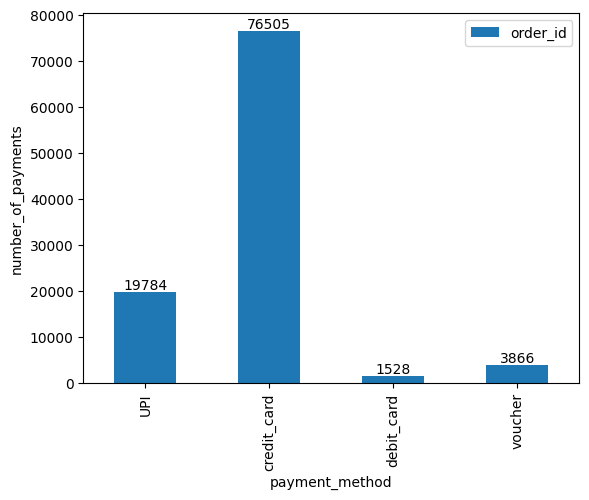

In [61]:
# we have duplicate values in order_id, so dropping the duplicate rows based on order_id & payment_type
mydf_ORDER_PAYMENTS_order_idANDpayment_type_drop_duplicates = mydf_ORDER_PAYMENTS.drop_duplicates(subset=['order_id', 'payment_type'])

# plotting the bar chart
mydf_ORDER_PAYMENTS_order_idANDpayment_type_drop_duplicates_payment_type_plot = mydf_ORDER_PAYMENTS_order_idANDpayment_type_drop_duplicates.groupby('payment_type').agg({'order_id':'count'}).reset_index().plot(kind='bar', x='payment_type', y='order_id')

# creating the bar labels in the bar chart
mydf_ORDER_PAYMENTS_order_idANDpayment_type_drop_duplicates_payment_type_plot.bar_label(mydf_ORDER_PAYMENTS_order_idANDpayment_type_drop_duplicates_payment_type_plot.containers[0])

plt.xlabel('payment_method')
plt.ylabel('number_of_payments')
plt.show()


In [62]:
# 5. Customer satisfaction towards category & product
    # a. Which categories (top 10) are maximum rated & minimum rated?

In [63]:
df_ORDER_REVIEW_RATINGS.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26


In [64]:
df_ORDER_REVIEW_RATINGS.order_id.nunique()

99441

In [65]:
df_ORDER_REVIEW_RATINGS.order_id.value_counts()
# we can see that a single order can have more than 1 review_score

order_id
03c939fd7fd3b38f8485a0f95798f1f6    3
df56136b8031ecd28e200bb18e6ddb2e    3
c88b1d1b157a9999ce368f218a407141    3
8e17072ec97ce29f0e1f111e598b0c85    3
8ef17147aad160f7780239dcf0acb400    2
                                   ..
00a250dbdb3153cc6ecf4d3f07ef6a17    1
9996aad294da648f199033d51534f004    1
5837a2c844decae8a778657425f6d664    1
5e82591b43cb83a7dd419ff564e44d04    1
90531360ecb1eec2a1fbb265a0db0508    1
Name: count, Length: 99441, dtype: int64

In [66]:
mydf_ORDER_REVIEW_RATINGS_avg_rating = df_ORDER_REVIEW_RATINGS.groupby('order_id').agg({'review_score':'mean'}).reset_index()
# the orders where we have more than 1 review_score, we can calculating the average of those reviews for that particular order


In [67]:
mydf_product_category_name_review_score = pd.merge(left=df_ORDER_ITEMS, right=mydf_ORDER_REVIEW_RATINGS_avg_rating, how='left', on='order_id').merge(df_PRODUCTS, how='left', on='product_id')[['product_category_name','review_score','product_id']]

In [68]:
# Top 10 highest rated Categories
mydf_product_category_name_review_score.groupby('product_category_name').agg({'review_score':'mean'}).reset_index().sort_values(by='review_score', ascending=False).head(10)

,product_category_name,review_score
11,Cds_Dvds_Musicals,4.642857
29,Fashion_Childrens_Clothes,4.500000
8,Books_General_Interest,4.439421
9,Books_Imported,4.400000
22,Costruction_Tools_Tools,4.359223
10,Books_Technical,4.333333
53,Luggage_Accessories,4.309524
64,Small_Appliances_Home_Oven_And_Coffee,4.302632
37,Food_Drink,4.300360
32,Fashion_Sport,4.233333


In [69]:
# Top 10 lowest rated Categories
mydf_product_category_name_review_score.groupby('product_category_name').agg({'review_score':'mean'}).reset_index().sort_values(by='review_score').head(10)

,product_category_name,review_score
61,Security_And_Services,2.500000
23,Diapers_And_Hygiene,3.256410
46,Home_Comfort_2,3.366667
57,Office_Furniture,3.480189
30,Fashion_Male_Clothing,3.621212
34,Fixed_Telephony,3.670455
58,Party_Supplies,3.767442
27,Fashio_Female_Clothing,3.781250
52,La_Cuisine,3.785714
4,Audio,3.814560


In [70]:
# Top 10 highest rated Products
mydf_product_category_name_review_score.groupby('product_id').agg({'review_score':'mean'}).reset_index().sort_values(by='review_score', ascending=False).head(10)

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
17330,86743ff92eee3d16b7df59cddd583b8c,5.0
17345,868ceb027ab706a4dee42e2220006b85,5.0
17343,868969d3a93aeeab7bfcd4fc3d3d65de,5.0
17342,868766ed2172644fdd977d6bd395a107,5.0
17340,8684bd8f93b4f4038d07188a23811e93,5.0
17335,867c96d2bb67aba6500a4c509cf76072,5.0
17334,867b820367ec206b38a357f2c12454b7,5.0
17333,867901d7e8488fb97f1fb538c09d476e,5.0
17325,865bfa00c1dad8f4146d3c2765f051ca,5.0


In [71]:
# Top 10 lowest rated Products
mydf_product_category_name_review_score.groupby('product_id').agg({'review_score':'mean'}).reset_index().sort_values(by='review_score').head(10)

,product_id,review_score
11572,592cc6634d2c783d297effc0b828bc37,1.0
5376,28c95d7653177449fd4b6fc7adb63ce9,1.0
5378,28d6d6a10ceb0636ae572e7efafef612,1.0
5379,28d7da9ebe96bfda54aed060b68b23a1,1.0
18040,8c4e5e50a08a443b7fbad34ad7587625,1.0
18039,8c4dc358af6e14174f2114be62c18f37,1.0
18034,8c4456c061013adccb1ba4cbce2d0365,1.0
18030,8c35dc99b37ba51780800ba049ed3616,1.0
5409,28fe66c8a81afe9be7829f40a5fae9ee,1.0
30663,ee37349d258101b9d573a256d1401ff7,1.0


In [72]:
# Average rating by location, seller, product, category, month etc
df_ORDER_REVIEW_RATINGS.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26


In [73]:
mydf_ORDER_ITEMSand_ORDER_REVIEW_RATINGS = pd.merge(left=df_ORDER_ITEMS, right=mydf_ORDER_REVIEW_RATINGS_avg_rating, how='left', on='order_id').merge(df_PRODUCTS, how='left', on='product_id')

In [74]:
# Average rating by Category
mydf_ORDER_ITEMSand_ORDER_REVIEW_RATINGS.groupby('product_category_name').agg({'review_score':'mean'}).reset_index()

,product_category_name,review_score
0,Agro_Industry_And_Commerce,4.000000
1,Air_Conditioning,3.919192
2,Art,3.918660
3,Arts_And_Craftmanship,4.125000
4,Audio,3.814560
...,...,...
66,Stationery,4.182956
67,Tablets_Printing_Image,4.048193
68,Telephony,3.934653
69,Toys,4.139543


In [75]:
# Average rating by seller
mydf_ORDER_ITEMSand_ORDER_REVIEW_RATINGS.groupby('seller_id').agg({'review_score':'mean'}).reset_index()

,seller_id,review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,3.874477
2,001e6ad469a905060d959994f1b41e4f,1.000000
3,002100f778ceb8431b7a1020ff7ab48f,3.981818
4,003554e2dce176b5555353e4f3555ac8,5.000000
...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,1.000000
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,4.250000
3092,ffeee66ac5d5a62fe688b9d26f83f534,4.214286
3093,fffd5413c0700ac820c7069d66d98c89,3.885246


In [76]:
# Average rating by product
mydf_ORDER_ITEMSand_ORDER_REVIEW_RATINGS.groupby('product_id').agg({'review_score':'mean'}).reset_index()

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,00088930e925c41fd95ebfe695fd2655,4.0
2,0009406fd7479715e4bef61dd91f2462,1.0
3,000b8f95fcb9e0096488278317764d19,5.0
4,000d9be29b5207b54e86aa1b1ac54872,5.0
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,4.5
32947,fff81cc3158d2725c0655ab9ba0f712c,4.0
32948,fff9553ac224cec9d15d49f5a263411f,5.0
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,5.0


In [77]:
# # Average rating by Month
pd.merge(left=df_ORDERS, right=mydf_ORDER_ITEMSand_ORDER_REVIEW_RATINGS, how='left', on='order_id').groupby('order_purchase_month').agg({'review_score':'mean'}).reset_index()

,order_purchase_month,review_score
0,1,3.944832
1,2,3.783314
2,3,3.775564
3,4,4.042499
4,5,4.119393
5,6,4.156271
6,7,4.180160
7,8,4.202583
8,9,4.117611
9,10,4.015743


In [78]:
# Average rating by location

# Average rating by State
pd.merge(left=df_ORDER_ITEMS, right=df_SELLERS, how='left', on='seller_id').merge(df_ORDER_REVIEW_RATINGS, how='left', on='order_id').groupby('seller_state').agg({'review_score':'mean'}).reset_index()

,seller_state,review_score
0,Andhra Pradesh,4.019711
1,Arunachal Pradesh,4.154248
2,Chhattisgarh,4.111963
3,Delhi,3.884944
4,Gujarat,3.936198
5,Haryana,4.074761
6,Himachal Pradesh,4.149554
7,Jammu & Kashmir,4.043765
8,Karnataka,4.033441
9,Kerala,4.243902
